In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df_victim_of_rape=pd.read_csv('20_Victims_of_rape.csv')

In [16]:
#Rape Victims By State

rape_victims_by_state=df_victim_of_rape.groupby('Area_Name').sum()
print('Total Rape Victims: ',rape_victims_by_state)

Total Rape Victims:                              Year  Rape_Cases_Reported  Victims_Above_50_Yrs  \
Area_Name                                                                     
Andaman & Nicobar Islands  60165                  168                     0   
Andhra Pradesh             60165                21392                   198   
Arunachal Pradesh          60165                  824                     0   
Assam                      60165                25524                   190   
Bihar                      60165                22526                    78   
Chandigarh                 60165                  454                     0   
Chhattisgarh               60165                19502                   226   
Dadra & Nagar Haveli       60165                   98                     0   
Daman & Diu                60165                   28                     0   
Delhi                      60165                10292                    26   
Goa                        6016

Text(0.5,1,'Rape Victims StateWise')

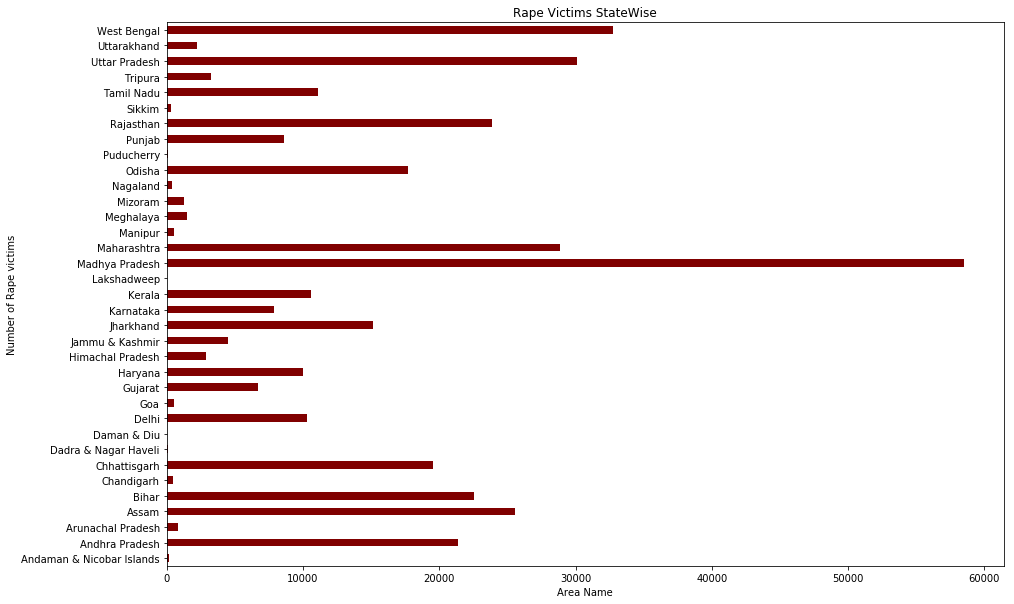

In [17]:
#plotting the Rape Victms by state
plt.subplots(figsize=(15,10))
rt=rape_victims_by_state['Rape_Cases_Reported']
#print(rt)
ax=rt.plot.barh(color='maroon')
ax.set_xlabel("Area Name")
ax.set_ylabel("Number of Rape victims")
ax.set_title("Rape Victims StateWise")
#plt.show()

In [18]:
df_victim_of_rape.groupby(['Year','Subgroup']).Rape_Cases_Reported.sum()

Year  Subgroup              
2001  Total Rape Victims        16075
      Victims of Incest Rape      439
      Victims of Other Rape     15636
2002  Total Rape Victims        16373
      Victims of Incest Rape      369
      Victims of Other Rape     16004
2003  Total Rape Victims        15847
      Victims of Incest Rape      399
      Victims of Other Rape     15448
2004  Total Rape Victims        18233
      Victims of Incest Rape      505
      Victims of Other Rape     17728
2005  Total Rape Victims        18359
      Victims of Incest Rape      750
      Victims of Other Rape     17609
2006  Total Rape Victims        19348
      Victims of Incest Rape      431
      Victims of Other Rape     18917
2007  Total Rape Victims        20737
      Victims of Incest Rape      405
      Victims of Other Rape     20332
2008  Total Rape Victims        21467
      Victims of Incest Rape      309
      Victims of Other Rape     21158
2009  Total Rape Victims        21397
      Victims of Ince

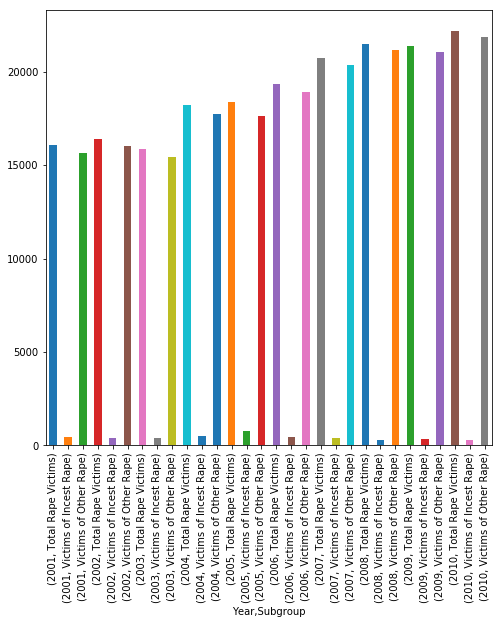

In [19]:
plt.figure(figsize=(8,8))
df_victim_of_rape.groupby(['Year','Subgroup']).Rape_Cases_Reported.sum().plot(kind='bar');

One important information that can be inferred is that with every passing year, no. of rapes are increasing.

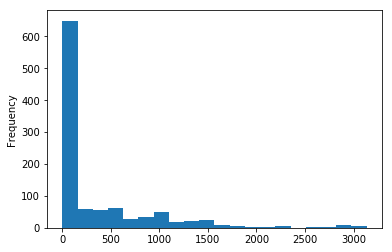

In [20]:
df_victim_of_rape.Rape_Cases_Reported.plot(kind='hist',bins=20);

We will explore the Rapes in Madhya Pradesh as the highes number have occured in the state.

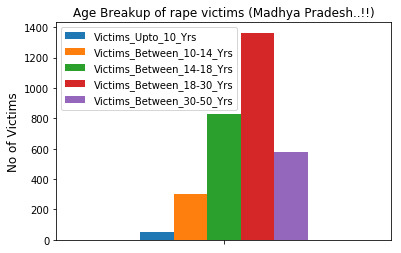

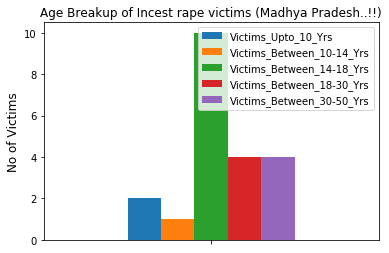

In [21]:
mp_total_rape = df_victim_of_rape.loc[df_victim_of_rape['Area_Name']=='Madhya Pradesh']
mp_victim_2010_total = mp_total_rape [(mp_total_rape['Year']==2010) & (mp_total_rape['Subgroup']=='Total Rape Victims')]
mp_victim_2010_total_incest_rape = mp_total_rape [(mp_total_rape['Year']==2010) & (mp_total_rape['Subgroup']=='Victims of Incest Rape')]

#Plotting age breakup of victims
ax = mp_victim_2010_total[['Victims_Upto_10_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs']].plot(kind='bar',legend=True, title = 'Age Breakup of rape victims (Madhya Pradesh..!!)')
ax.set_ylabel("No of Victims", fontsize=12)
ax.set_xticklabels([]);
ax = mp_victim_2010_total_incest_rape[['Victims_Upto_10_Yrs','Victims_Between_10-14_Yrs','Victims_Between_14-18_Yrs','Victims_Between_18-30_Yrs','Victims_Between_30-50_Yrs']].plot(kind='bar',legend=True, title = 'Age Breakup of Incest rape victims (Madhya Pradesh..!!)')
ax.set_ylabel("No of Victims", fontsize=12)
ax.set_xticklabels([]);


Lets find Correlation between all kinds of Age Groups with Year

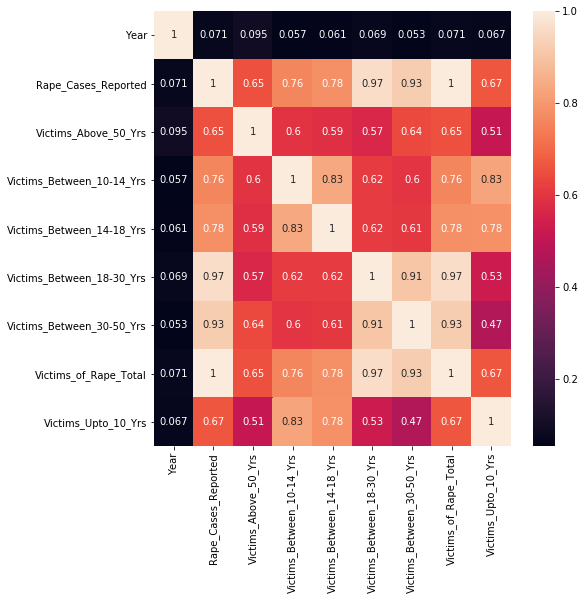

In [22]:
import seaborn as sns
plt.figure(figsize=(8,8))
df_corr=df_victim_of_rape.corr()
sns.heatmap(df_corr, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values,annot=True);

We can see that year is the least correlated which tells us that age of the victim doesn't matter.

In [23]:
# What is the mean of the Total Rapes:
df_mean = df_victim_of_rape.Victims_of_Rape_Total.mean()
print(df_mean)

362.1980952380952


In [24]:
# We have seen the MEAN value, now we will try to see the states where the Total Rapes are greater than MEAN
df_total = df_victim_of_rape[df_victim_of_rape.Victims_of_Rape_Total>362]
df_total.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
30,Andhra Pradesh,2001,Total Rape Victims,871,14,138,254,328,80,871,57
32,Andhra Pradesh,2001,Victims of Other Rape,867,14,136,254,326,80,867,57
33,Andhra Pradesh,2002,Total Rape Victims,1002,8,67,35,709,148,1002,35
35,Andhra Pradesh,2002,Victims of Other Rape,997,8,65,35,706,148,997,35
36,Andhra Pradesh,2003,Total Rape Victims,946,7,135,215,429,127,946,33


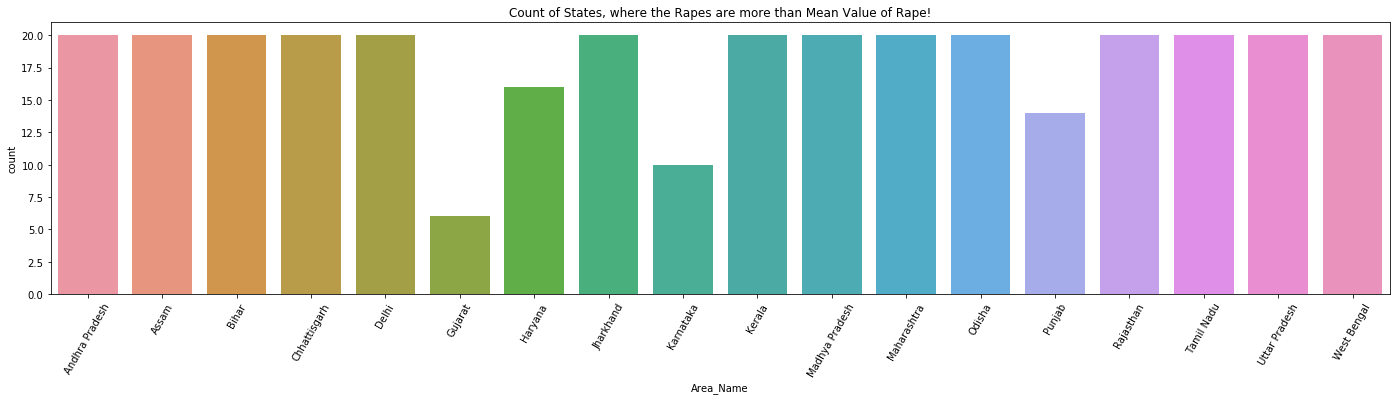

In [25]:
# Let's find out those States! where the Rapes are more than Mean!
plt.figure(figsize=(24,5))
plt.title('Count of States, where the Rapes are more than Mean Value of Rape!');
sns.countplot(df_total.Area_Name);
plt.xticks(rotation = 60);

In [26]:
df_total.describe()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
count,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,2005.733129,1063.202454,5.472393,67.463190,154.208589,628.365031,180.334356,1063.929448,28.085890
std,2.870423,634.447012,6.911585,73.283413,165.483402,373.000563,154.311997,634.432717,26.971529
min,2001.000000,366.000000,0.000000,0.000000,0.000000,58.000000,6.000000,366.000000,0.000000
25%,2003.000000,573.000000,1.000000,15.000000,32.000000,346.000000,64.000000,574.000000,7.000000
50%,2006.000000,939.000000,3.000000,42.000000,86.500000,586.000000,136.000000,939.000000,22.000000
75%,2008.000000,1346.750000,7.000000,107.000000,236.000000,785.000000,230.250000,1346.750000,38.000000
max,2010.000000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


In [28]:
df_total.shape

(326, 11)

In [29]:
df_total.Victims_Upto_10_Yrs.sum()

9156

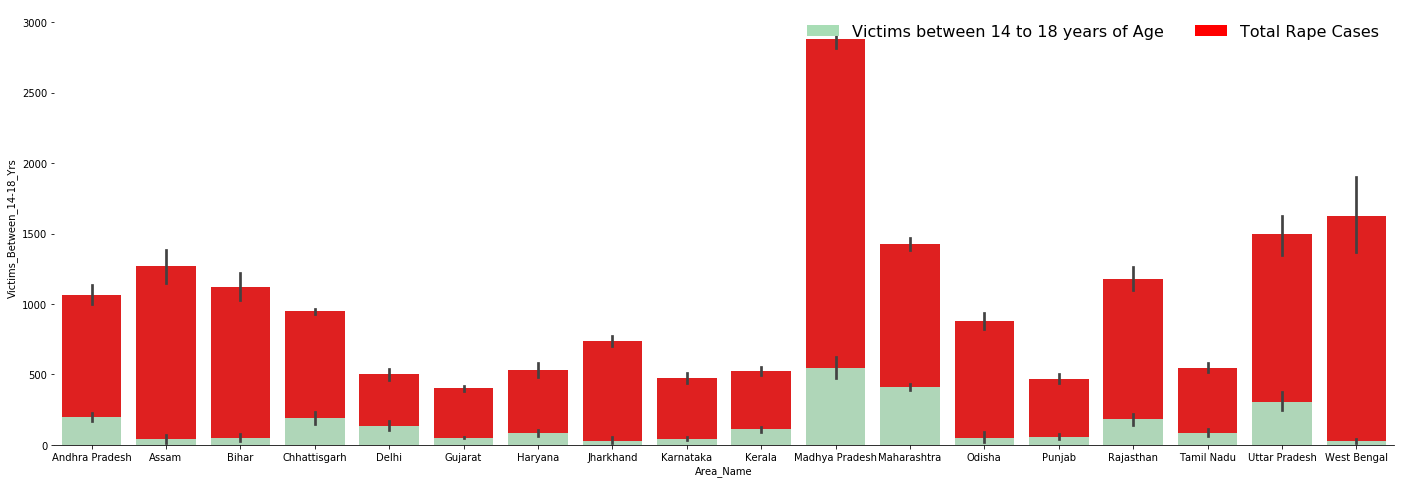

In [30]:
plt.figure(figsize=(24,8))
sns.barplot(x = df_total.Area_Name, y = df_total['Rape_Cases_Reported'], color = "red")
upto_18 = sns.barplot(x = df_total.Area_Name, y = df_total['Victims_Between_14-18_Yrs'], color = "#a8ddb5")
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
upto_18 = plt.Rectangle((0,0),1,1,fc='#a8ddb5',  edgecolor = 'none')
l = plt.legend([upto_18, topbar], ['Victims between 14 to 18 years of Age', 'Total Rape Cases'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)
sns.despine(left=True)

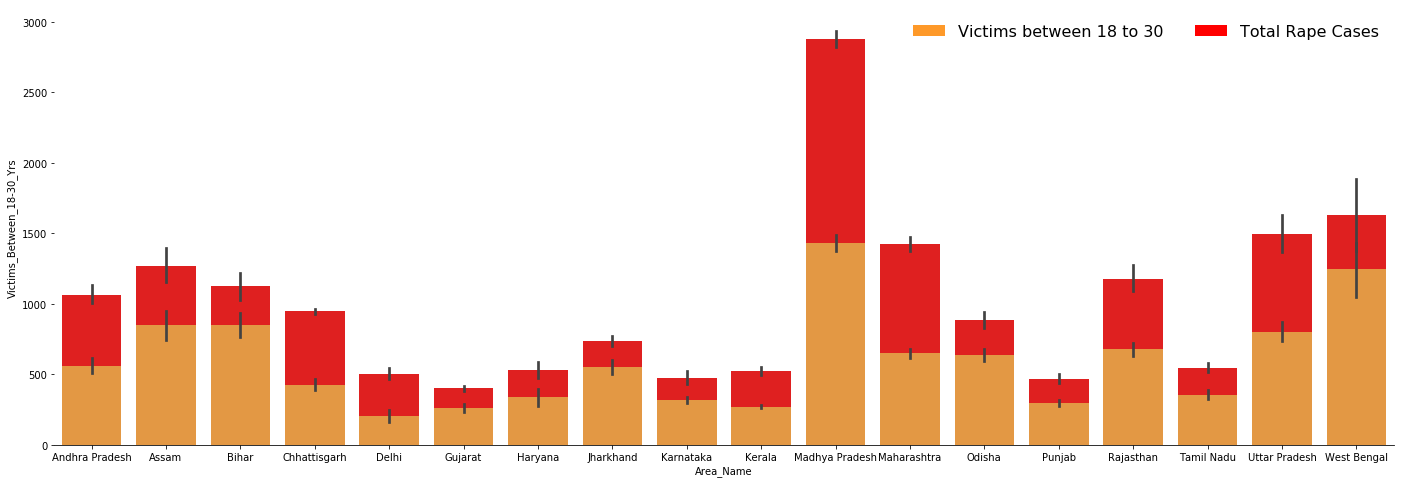

In [31]:
plt.figure(figsize=(24,8))
sns.barplot(x = df_total.Area_Name, y = df_total['Rape_Cases_Reported'], color = "red")
upto_30 = sns.barplot(x = df_total.Area_Name, y = df_total['Victims_Between_18-30_Yrs'], color = "#fe9929")
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
upto_30 = plt.Rectangle((0,0),1,1,fc='#fe9929',  edgecolor = 'none')
l = plt.legend([upto_30, topbar], ['Victims between 18 to 30', 'Total Rape Cases'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)
sns.despine(left=True)
#upto_30.set_ylabel("Y-axis label");
#upto_30.set_xlabel("X-axis label");

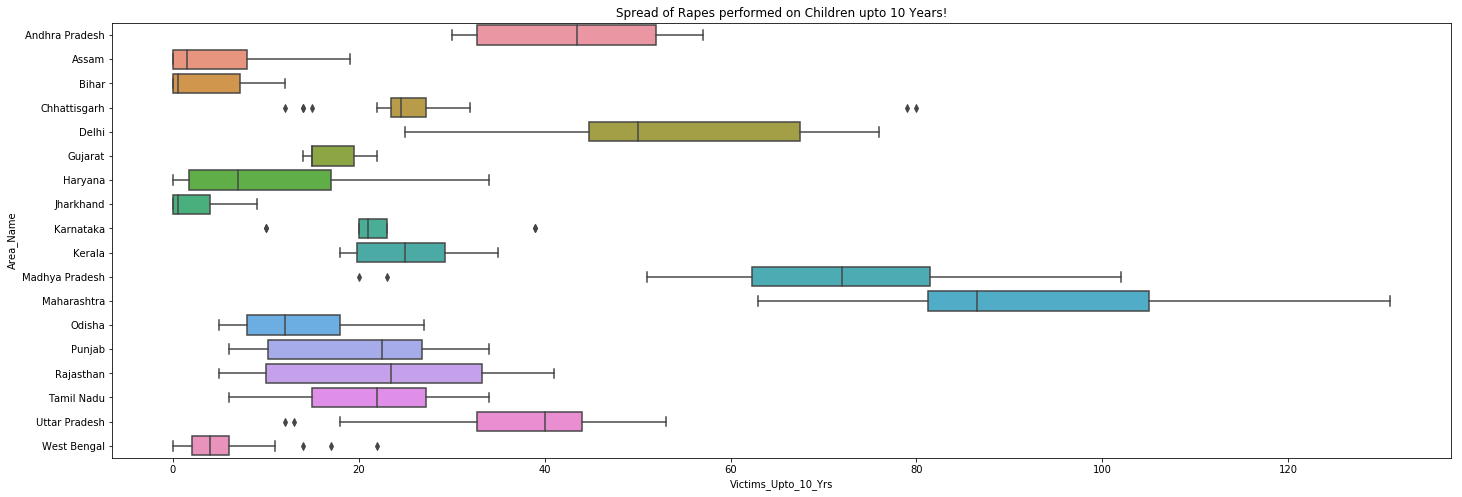

In [32]:
plt.figure(figsize=(24,8))
sns.boxplot(df_total.Victims_Upto_10_Yrs,df_total.Area_Name,data = df_total);
plt.title('Spread of Rapes performed on Children upto 10 Years!');